In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from env import get_db_url

In [3]:
n_trials = 10000
np.random.seed(24)

# 1

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

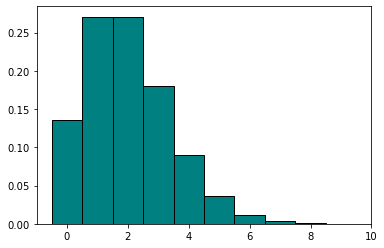

In [4]:
dist = stats.poisson(2)
x = range(10)
y = dist.pmf(x)
plt.bar(x, y, edgecolor='black', color='teal', width=1);

In [5]:
num_of_cars = np.array(dist.rvs(n_trials))

- What is the probability that no cars drive up in the noon hour?

In [6]:
# Experimental
(num_of_cars == 0).mean()

0.138

In [7]:
# Theoretical
dist.pmf(0)

0.1353352832366127

- What is the probability that 3 or more cars come through the drive through?

In [8]:
# Experimental
(num_of_cars >= 3).mean()

0.3212

In [9]:
# Theoretical
dist.sf(2)

0.32332358381693654

- How likely is it that the drive through gets at least 1 car?

In [10]:
# Experimental
(num_of_cars > 0).mean()

0.862

In [11]:
# Theoretical
dist.sf(0)

0.8646647167633873

# 2

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

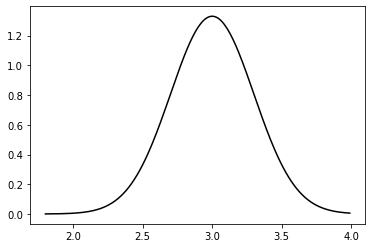

In [152]:
grades_dist = stats.norm(3.0, 0.3)

x = np.arange(1.8, 4.0, 0.01)
y = grades_dist.pdf(x)

plt.plot(x, y, color='black');

In [13]:
grades_sim = grades_dist.rvs(n_trials)

- What grade point average is required to be in the top 5% of the graduating class?

In [14]:
# Experimental
np.percentile(grades_sim, 95)

3.4984462616594385

In [15]:
# Theoretical
grades_dist.isf(0.05)

3.4934560880854417

- What GPA constitutes the bottom 15% of the class?

In [16]:
# Experimental
np.percentile(grades_sim, 15)

2.6780320346656667

In [17]:
# Theoretical
grades_dist.ppf(0.15)

2.689069983151863

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [18]:
# Experimental
np.percentile(grades_sim, 30)

2.8386513379763243

In [19]:
# Theoretical
# The range is 0.0 - 2.84
grades_dist.ppf(0.3)

2.842679846187588

- If I have a GPA of 3.5, what percentile am I in?

In [20]:
# Experimental
(grades_sim >= 3.5).mean()

0.0494

In [21]:
# Theoretical
# Top 33%
grades_dist.sf(3.5)

0.0477903522728147

# 3

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [22]:
visitors = 4326
click_through_rate = 0.02

click_through_dist = stats.binom(visitors, click_through_rate)

In [23]:
click_through_sim = click_through_dist.rvs(visitors)

In [24]:
# Experimental
(click_through_sim >= 97).mean()

0.1398520573277855

In [25]:
# Theoretical
click_through_dist.sf(96)

0.13975823631416445

# 4

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [37]:
chance_of_correct_guess = 1 / 10_000
questions = 60

answers_dist = stats.binom(questions, chance_of_correct_guess)

In [34]:
answers_sim = answers_dist.rvs(n_trials)

In [35]:
# Experimental
(answers_sim >= 1).mean()

0.006

In [36]:
# Theoretical
answers_dist.sf(0)

0.005982334171291066

# 5

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

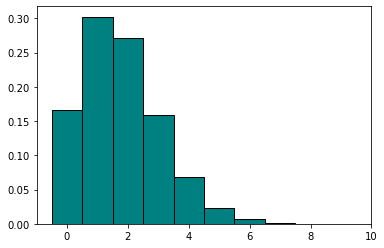

In [119]:
chance_of_clean_break_area = 0.03
students_that_visit_break_area = int(0.9 * (3 * 22))

clean_break_area_dist = stats.binom(students_that_visit_break_area, chance_of_clean_break_area)

x = range(10)
y = clean_break_area_dist.pmf(x)
plt.bar(x, y, edgecolor='black', color='teal', width=1);

In [60]:
# Probability of break area getting cleaned on any given day
clean_break_area_sim = clean_break_area_dist.rvs(n_trials)

# Experimental
(clean_break_area_sim >= 1).mean()

0.8288

In [61]:
# Theoretical
clean_break_area_dist.sf(0)

0.8342199288437352

In [62]:
# Probability of break area goes two days without getting cleaned
n_days = 2
clean_break_area_sim = clean_break_area_dist.rvs(size = (n_trials, n_days))

# Experimental
1 - clean_break_area_sim.any(axis = 1).mean()

0.025699999999999945

In [168]:
# Theoretical
n_days = 2
stats.binom(n_days, clean_break_area_dist.sf(0)).pmf(0)

0.027483031992576224

In [117]:
# Probability of break area not getting cleaned all week
n_days = 5
clean_break_area_sim = clean_break_area_dist.rvs(size = (n_trials, n_days))

# Experimental
1 - clean_break_area_sim.any(axis = 1).mean()

0.00019999999999997797

In [171]:
# Theoretical
n_days = 5
stats.binom(n_days, clean_break_area_dist.sf(0)).pmf(0)

0.00012521651388091348

# 6

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [66]:
time_per_order =  2
time_to_get_food = 10
time_for_lunch = 60
time_remaining = 15

avg_line = 15
std_dev = 3

line_dist = stats.norm(avg_line, std_dev)

In [73]:
line_sim = line_dist.rvs(n_trials)

In [70]:
max_line_length = int((time_for_lunch - time_remaining - time_to_get_food) / 2)

In [74]:
# Experimental
(line_sim <= max_line_length).mean()

0.7438

In [72]:
# Theoretical
line_dist.cdf(17)

0.7475074624530771

# 7

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [92]:
sql = '''
SELECT
    emp_no,
    salary
FROM salaries
WHERE to_date > NOW();
'''

salaries = pd.read_sql(sql, get_db_url('employees'))

In [88]:
avg_salary = salaries.salary.mean()
std_dev = salaries.salary.std()

total_employees = salaries.shape[0]

In [84]:
salary_dist = stats.norm(avg_salary, std_dev)

- What percent of employees earn less than 60,000?

In [86]:
# Theoretical
salary_dist.cdf(60_000)

0.24385742480214423

In [91]:
# Actual
(salaries.salary < 60_000).sum() / total_employees

0.2705727041028802

- What percent of employees earn more than 95,000?

In [93]:
# Theoretical
salary_dist.sf(95_000)

0.09208819199804053

In [95]:
# Actual
(salaries.salary > 95_000).sum() / total_employees

0.1086272092752078

- What percent of employees earn between 65,000 and 80,000?

In [99]:
# Theoretical
salary_dist.cdf(80_000) - salary_dist.cdf(65_000)

0.3350605685446666

In [98]:
# Actual
(salaries.salary.between(65_000, 80_000)).sum() / total_employees

0.32515700221552196

- What do the top 5% of employees make?

In [100]:
# Theoretical
salary_dist.isf(0.05)

100484.64454102777

In [101]:
# Actual
np.percentile(salaries.salary, 95)

104225.84999999998